In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
%matplotlib inline

In [2]:
# Importing dataset
cols=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','annual_income']
df = pd.read_csv('adult.data',names=cols)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


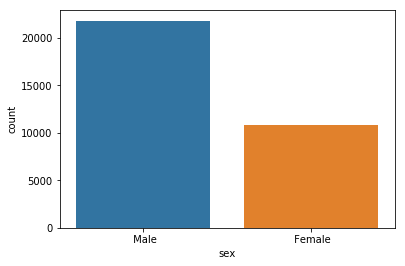

In [3]:
# Visualizing the distribution of gender in the dataset
sns.countplot(df.sex)  
plt.show()  

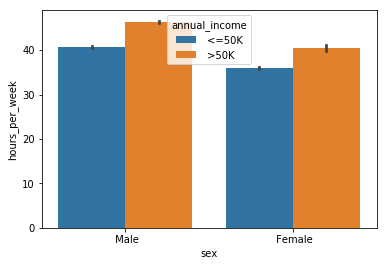

In [4]:
#Annual income based on gender
sns.barplot(df.sex, df['hours_per_week'], hue=df['annual_income'])  
plt.show()

### Irrespective of gender annual income <50K tend to work more per week

In [5]:
(df['native_country'].value_counts() / df.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
Name: native_country, dtype: float64

In [6]:
np.count_nonzero(df.isnull())

0

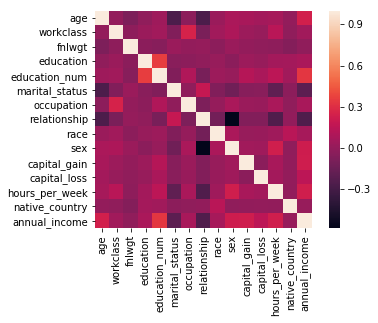

In [7]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
annual_income     object
dtype: object

In [9]:
categorical_features=df.select_dtypes(['category','object']).columns
df[categorical_features]= df[categorical_features].astype('category')
df[categorical_features] = df[categorical_features].apply(lambda x: x.cat.codes)
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


In [10]:
#Making all the value to be in single range
num_features = df.columns.drop(['annual_income'])

scaled_features = {}
for i in num_features:
    mean, std = df[i].mean(), df[i].std()
    scaled_features[i] = [mean, std]
    df.loc[:, i] = (df[i] - mean)/std
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,0.030670,2.150546,-1.063594,-0.335432,1.134721,0.921620,-1.317789,-0.277801,0.393661,0.703061,0.148451,-0.216656,-0.035429,0.291564,0
1,0.837096,1.463713,-1.008692,-0.335432,1.134721,-0.406206,-0.608377,-0.900167,0.393661,0.703061,-0.145918,-0.216656,-2.222119,0.291564,0
2,-0.042641,0.090049,0.245075,0.181329,-0.420053,-1.734032,-0.135436,-0.277801,0.393661,0.703061,-0.145918,-0.216656,-0.035429,0.291564,0
3,1.057031,0.090049,0.425795,-2.402474,-1.197440,-0.406206,-0.135436,-0.900167,-1.962591,0.703061,-0.145918,-0.216656,-0.035429,0.291564,0
4,-0.775756,0.090049,1.408154,-0.335432,1.134721,-0.406206,0.810446,2.211664,-1.962591,-1.422309,-0.145918,-0.216656,-0.035429,-4.054160,0


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_income'],
      dtype='object')

In [14]:
from sklearn.cross_validation import train_test_split
X = df[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']].as_matrix()
Y = df['annual_income'].as_matrix()

Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y,test_size=0.20,
                                               random_state=123)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


((26048, 14), (6513, 14), (26048,), (6513,))

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
mod_log = LogisticRegression()
mod_log.fit(Xtrain,Ytrain)
mod_log_train_score=mod_log.score(Xtrain,Ytrain)
mod_log_test_score=mod_log.score(Xtest,Ytest)

In [16]:
print(mod_log_test_score)
print(mod_log_train_score)

0.8277291570704745
0.824132371007371


In [17]:
from sklearn.metrics import classification_report
pred_quality = mod_log.predict(Xtest)
print(classification_report(Ytest,pred_quality))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4927
          1       0.74      0.45      0.56      1586

avg / total       0.82      0.83      0.81      6513



### The logistic regression model is biased, it can predict with 89% accuracy of annual income <=50K whereas it can predict only with 56% accuracy of annual income which is >=50K

## Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
mod_dt = DecisionTreeClassifier()
mod_dt.fit(Xtrain,Ytrain)
mod_dt_train_score=mod_dt.score(Xtrain,Ytrain)
mod_dt_test_score=mod_dt.score(Xtest,Ytest)
print(mod_dt_train_score)
print(mod_dt_test_score)

0.9999616093366094
0.8200522032857362


In [19]:
from sklearn.metrics import classification_report
pred_quality = mod_dt.predict(Xtest)
print(classification_report(Ytest,pred_quality))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88      4927
          1       0.63      0.65      0.64      1586

avg / total       0.82      0.82      0.82      6513



## Using decision tree the model score to predict annual income >=50k increased to 64%

## Feature Importance

In [22]:
temp = pd.DataFrame()
temp['variable'] = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
temp['VarImp'] = np.round(mod_dt.feature_importances_,2)
temp.sort_index(by='VarImp',ascending=False)

C:\Users\saraswathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,variable,VarImp
2,fnlwgt,0.20
7,relationship,0.20
0,age,0.12
4,education_num,0.12
10,capital_gain,0.11
12,hours_per_week,0.07
6,occupation,0.06
11,capital_loss,0.04
1,workclass,0.03
3,education,0.01


### Final weight and relationship contributes more to the model

## Random Forrest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

mod_rf = RandomForestRegressor(n_estimators=500, random_state=0)
mod_rf.fit(Xtrain , Ytrain)
Ypred = mod_rf.predict(Xtest)

print('Test Score:',np.round(mod_rf.score(Xtest , Ytest),2))
print('Train Score:',np.round(mod_rf.score(Xtrain , Ytrain),2))
print('MSE:', np.round(mean_squared_error(Ytest, Ypred),2))

Test Score: 0.46
Train Score: 0.92
MSE: 0.1


## Gaussian Naive Bayes Classifier Model

In [30]:
from sklearn.naive_bayes import GaussianNB
mod_GNB = GaussianNB()
mod_GNB.fit(Xtrain, Ytrain)
Ypred = mod_GNB.predict(Xtest)
print(classification_report(Ytest,Ypred))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88      4927
          1       0.70      0.35      0.47      1586

avg / total       0.79      0.81      0.78      6513



## So far the best algo for classifier problem is decision tree, may be a tweaking in random forrest parameters will yield better result.